# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 14485 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 14485) |           | Elapsed Time: 0:00:39 ETA:  6 days, 16:28:29

  0% (   48 of 14485) |                    | Elapsed Time: 0:00:40 ETA:  0:04:29

  0% (   95 of 14485) |                    | Elapsed Time: 0:00:41 ETA:  0:04:28

  0% (  144 of 14485) |                    | Elapsed Time: 0:00:42 ETA:  0:04:22

  1% (  182 of 14485) |                    | Elapsed Time: 0:00:43 ETA:  0:04:33

  1% (  228 of 14485) |                    | Elapsed Time: 0:00:44 ETA:  0:04:32

  1% (  275 of 14485) |                    | Elapsed Time: 0:00:45 ETA:  0:04:30

  2% (  318 of 14485) |                    | Elapsed Time: 0:00:46 ETA:  0:04:33

  2% (  363 of 14485) |                    | Elapsed Time: 0:00:47 ETA:  0:04:34

  2% (  411 of 14485) |                    | Elapsed Time: 0:00:48 ETA:  0:04:33

  3% (  460 of 14485) |                    | Elapsed Time: 0:00:49 ETA:  0:04:30

  3% (  508 of 14485) |                    | Elapsed Time: 0:00:51 ETA:  0:04:31

  3% (  544 of 14485) |                    | Elapsed Time: 0:00:51 ETA:  0:04:24

  4% (  590 of 14485) |                    | Elapsed Time: 0:00:52 ETA:  0:04:24

  4% (  635 of 14485) |                    | Elapsed Time: 0:00:53 ETA:  0:04:24

  4% (  680 of 14485) |                    | Elapsed Time: 0:00:54 ETA:  0:04:21

  5% (  725 of 14485) |#                   | Elapsed Time: 0:00:55 ETA:  0:04:21

  5% (  769 of 14485) |#                   | Elapsed Time: 0:00:56 ETA:  0:04:24

  5% (  815 of 14485) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:25

  5% (  863 of 14485) |#                   | Elapsed Time: 0:00:58 ETA:  0:04:24

  6% (  906 of 14485) |#                   | Elapsed Time: 0:00:59 ETA:  0:04:22

  6% (  952 of 14485) |#                   | Elapsed Time: 0:01:00 ETA:  0:04:21

  6% (  995 of 14485) |#                   | Elapsed Time: 0:01:01 ETA:  0:04:22

  7% ( 1042 of 14485) |#                   | Elapsed Time: 0:01:02 ETA:  0:04:19

  7% ( 1087 of 14485) |#                   | Elapsed Time: 0:01:03 ETA:  0:04:14

  7% ( 1134 of 14485) |#                   | Elapsed Time: 0:01:04 ETA:  0:04:12

  8% ( 1181 of 14485) |#                   | Elapsed Time: 0:01:05 ETA:  0:04:08

  8% ( 1228 of 14485) |#                   | Elapsed Time: 0:01:06 ETA:  0:04:06

  8% ( 1268 of 14485) |#                   | Elapsed Time: 0:01:07 ETA:  0:04:05

  9% ( 1314 of 14485) |#                   | Elapsed Time: 0:01:08 ETA:  0:04:06

  9% ( 1361 of 14485) |#                   | Elapsed Time: 0:01:09 ETA:  0:04:05

  9% ( 1409 of 14485) |#                   | Elapsed Time: 0:01:10 ETA:  0:04:00

 10% ( 1449 of 14485) |##                  | Elapsed Time: 0:01:11 ETA:  0:04:02

 10% ( 1489 of 14485) |##                  | Elapsed Time: 0:01:12 ETA:  0:04:06

 10% ( 1532 of 14485) |##                  | Elapsed Time: 0:01:13 ETA:  0:04:08

 10% ( 1580 of 14485) |##                  | Elapsed Time: 0:01:14 ETA:  0:04:06

 11% ( 1630 of 14485) |##                  | Elapsed Time: 0:01:15 ETA:  0:04:06

 11% ( 1674 of 14485) |##                  | Elapsed Time: 0:01:16 ETA:  0:04:07

 11% ( 1721 of 14485) |##                  | Elapsed Time: 0:01:17 ETA:  0:04:05

 12% ( 1765 of 14485) |##                  | Elapsed Time: 0:01:18 ETA:  0:04:08

 12% ( 1768 of 14485) |##                  | Elapsed Time: 0:01:20 ETA:  0:04:59

 12% ( 1811 of 14485) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:55

 12% ( 1850 of 14485) |##                  | Elapsed Time: 0:01:22 ETA:  0:04:59

 13% ( 1896 of 14485) |##                  | Elapsed Time: 0:01:23 ETA:  0:05:01

 13% ( 1944 of 14485) |##                  | Elapsed Time: 0:01:24 ETA:  0:05:00

 13% ( 1992 of 14485) |##                  | Elapsed Time: 0:01:25 ETA:  0:04:57

 14% ( 2039 of 14485) |##                  | Elapsed Time: 0:01:26 ETA:  0:04:56

 14% ( 2084 of 14485) |##                  | Elapsed Time: 0:01:27 ETA:  0:04:54

 14% ( 2134 of 14485) |##                  | Elapsed Time: 0:01:28 ETA:  0:03:53

 15% ( 2173 of 14485) |###                 | Elapsed Time: 0:01:28 ETA:  0:03:47

 15% ( 2219 of 14485) |###                 | Elapsed Time: 0:01:29 ETA:  0:03:40

 15% ( 2269 of 14485) |###                 | Elapsed Time: 0:01:31 ETA:  0:03:36

 16% ( 2318 of 14485) |###                 | Elapsed Time: 0:01:32 ETA:  0:03:34

 16% ( 2354 of 14485) |###                 | Elapsed Time: 0:01:32 ETA:  0:03:31

 16% ( 2396 of 14485) |###                 | Elapsed Time: 0:01:33 ETA:  0:03:34

 16% ( 2445 of 14485) |###                 | Elapsed Time: 0:01:34 ETA:  0:03:32

 17% ( 2495 of 14485) |###                 | Elapsed Time: 0:01:35 ETA:  0:03:27

 17% ( 2535 of 14485) |###                 | Elapsed Time: 0:01:36 ETA:  0:03:28

 17% ( 2584 of 14485) |###                 | Elapsed Time: 0:01:37 ETA:  0:03:26

 18% ( 2632 of 14485) |###                 | Elapsed Time: 0:01:38 ETA:  0:03:23

 18% ( 2682 of 14485) |###                 | Elapsed Time: 0:01:39 ETA:  0:03:22

 18% ( 2716 of 14485) |###                 | Elapsed Time: 0:01:40 ETA:  0:03:19

 19% ( 2765 of 14485) |###                 | Elapsed Time: 0:01:41 ETA:  0:03:18

 19% ( 2810 of 14485) |###                 | Elapsed Time: 0:01:42 ETA:  0:03:15

 19% ( 2854 of 14485) |###                 | Elapsed Time: 0:01:43 ETA:  0:03:18

 20% ( 2897 of 14485) |####                | Elapsed Time: 0:01:44 ETA:  0:03:22

 20% ( 2942 of 14485) |####                | Elapsed Time: 0:01:45 ETA:  0:03:23

 20% ( 2991 of 14485) |####                | Elapsed Time: 0:01:46 ETA:  0:03:22

 20% ( 3038 of 14485) |####                | Elapsed Time: 0:01:47 ETA:  0:03:22

 21% ( 3079 of 14485) |####                | Elapsed Time: 0:01:48 ETA:  0:03:24

 21% ( 3126 of 14485) |####                | Elapsed Time: 0:01:49 ETA:  0:03:27

 21% ( 3176 of 14485) |####                | Elapsed Time: 0:01:50 ETA:  0:03:25

 22% ( 3224 of 14485) |####                | Elapsed Time: 0:01:51 ETA:  0:03:22

 22% ( 3260 of 14485) |####                | Elapsed Time: 0:01:52 ETA:  0:03:19

 22% ( 3309 of 14485) |####                | Elapsed Time: 0:01:53 ETA:  0:03:14

 23% ( 3354 of 14485) |####                | Elapsed Time: 0:01:54 ETA:  0:03:13

 23% ( 3405 of 14485) |####                | Elapsed Time: 0:01:55 ETA:  0:03:11

 23% ( 3441 of 14485) |####                | Elapsed Time: 0:01:55 ETA:  0:03:12

 24% ( 3485 of 14485) |####                | Elapsed Time: 0:01:56 ETA:  0:03:13

 24% ( 3527 of 14485) |####                | Elapsed Time: 0:01:57 ETA:  0:03:16

 24% ( 3571 of 14485) |####                | Elapsed Time: 0:01:58 ETA:  0:03:20

 25% ( 3622 of 14485) |#####               | Elapsed Time: 0:02:00 ETA:  0:03:22

 25% ( 3670 of 14485) |#####               | Elapsed Time: 0:02:01 ETA:  0:03:23

 25% ( 3718 of 14485) |#####               | Elapsed Time: 0:02:02 ETA:  0:03:19

 25% ( 3762 of 14485) |#####               | Elapsed Time: 0:02:03 ETA:  0:03:24

 26% ( 3803 of 14485) |#####               | Elapsed Time: 0:02:04 ETA:  0:03:20

 26% ( 3852 of 14485) |#####               | Elapsed Time: 0:02:05 ETA:  0:03:15

 26% ( 3901 of 14485) |#####               | Elapsed Time: 0:02:06 ETA:  0:03:08

 27% ( 3944 of 14485) |#####               | Elapsed Time: 0:02:07 ETA:  0:03:07

 27% ( 3984 of 14485) |#####               | Elapsed Time: 0:02:07 ETA:  0:03:05

 27% ( 4032 of 14485) |#####               | Elapsed Time: 0:02:08 ETA:  0:03:03

 28% ( 4074 of 14485) |#####               | Elapsed Time: 0:02:09 ETA:  0:03:07

 28% ( 4116 of 14485) |#####               | Elapsed Time: 0:02:10 ETA:  0:03:11

 28% ( 4165 of 14485) |#####               | Elapsed Time: 0:02:12 ETA:  0:03:10

 29% ( 4209 of 14485) |#####               | Elapsed Time: 0:02:13 ETA:  0:03:13

 29% ( 4250 of 14485) |#####               | Elapsed Time: 0:02:14 ETA:  0:03:19

 29% ( 4285 of 14485) |#####               | Elapsed Time: 0:02:15 ETA:  0:03:27

 29% ( 4319 of 14485) |#####               | Elapsed Time: 0:02:16 ETA:  0:03:39

 30% ( 4346 of 14485) |######              | Elapsed Time: 0:02:16 ETA:  0:03:45

 30% ( 4391 of 14485) |######              | Elapsed Time: 0:02:17 ETA:  0:03:41

 30% ( 4439 of 14485) |######              | Elapsed Time: 0:02:18 ETA:  0:03:34

 30% ( 4482 of 14485) |######              | Elapsed Time: 0:02:19 ETA:  0:03:34

 31% ( 4527 of 14485) |######              | Elapsed Time: 0:02:20 ETA:  0:03:34

 31% ( 4574 of 14485) |######              | Elapsed Time: 0:02:21 ETA:  0:03:27

 31% ( 4618 of 14485) |######              | Elapsed Time: 0:02:22 ETA:  0:03:16

 32% ( 4658 of 14485) |######              | Elapsed Time: 0:02:23 ETA:  0:03:08

 32% ( 4708 of 14485) |######              | Elapsed Time: 0:02:25 ETA:  0:03:06

 32% ( 4752 of 14485) |######              | Elapsed Time: 0:02:26 ETA:  0:03:09

 33% ( 4798 of 14485) |######              | Elapsed Time: 0:02:27 ETA:  0:03:04

 33% ( 4837 of 14485) |######              | Elapsed Time: 0:02:28 ETA:  0:03:08

 33% ( 4889 of 14485) |######              | Elapsed Time: 0:02:29 ETA:  0:03:07

 34% ( 4938 of 14485) |######              | Elapsed Time: 0:02:30 ETA:  0:03:01

 34% ( 4980 of 14485) |######              | Elapsed Time: 0:02:31 ETA:  0:02:58

 34% ( 5018 of 14485) |######              | Elapsed Time: 0:02:33 ETA:  0:04:05

 35% ( 5070 of 14485) |#######             | Elapsed Time: 0:02:34 ETA:  0:04:03

 35% ( 5119 of 14485) |#######             | Elapsed Time: 0:02:35 ETA:  0:03:58

 35% ( 5165 of 14485) |#######             | Elapsed Time: 0:02:36 ETA:  0:03:49

 35% ( 5214 of 14485) |#######             | Elapsed Time: 0:02:37 ETA:  0:03:45

 36% ( 5251 of 14485) |#######             | Elapsed Time: 0:02:38 ETA:  0:03:36

 36% ( 5302 of 14485) |#######             | Elapsed Time: 0:02:39 ETA:  0:03:33

 36% ( 5351 of 14485) |#######             | Elapsed Time: 0:02:40 ETA:  0:03:24

 37% ( 5400 of 14485) |#######             | Elapsed Time: 0:02:41 ETA:  0:02:21

 37% ( 5432 of 14485) |#######             | Elapsed Time: 0:02:42 ETA:  0:02:19

 37% ( 5483 of 14485) |#######             | Elapsed Time: 0:02:43 ETA:  0:02:16

 38% ( 5528 of 14485) |#######             | Elapsed Time: 0:02:44 ETA:  0:02:17

 38% ( 5577 of 14485) |#######             | Elapsed Time: 0:02:45 ETA:  0:02:14

 38% ( 5613 of 14485) |#######             | Elapsed Time: 0:02:46 ETA:  0:02:13

 39% ( 5661 of 14485) |#######             | Elapsed Time: 0:02:47 ETA:  0:02:14

 39% ( 5714 of 14485) |#######             | Elapsed Time: 0:02:48 ETA:  0:02:11

 39% ( 5762 of 14485) |#######             | Elapsed Time: 0:02:49 ETA:  0:02:11

 40% ( 5794 of 14485) |########            | Elapsed Time: 0:02:49 ETA:  0:02:12

 40% ( 5843 of 14485) |########            | Elapsed Time: 0:02:50 ETA:  0:02:10

 40% ( 5883 of 14485) |########            | Elapsed Time: 0:02:51 ETA:  0:02:16

 40% ( 5930 of 14485) |########            | Elapsed Time: 0:02:52 ETA:  0:02:14

 41% ( 5976 of 14485) |########            | Elapsed Time: 0:02:53 ETA:  0:02:15

 41% ( 6019 of 14485) |########            | Elapsed Time: 0:02:54 ETA:  0:02:18

 41% ( 6072 of 14485) |########            | Elapsed Time: 0:02:55 ETA:  0:02:14

 42% ( 6115 of 14485) |########            | Elapsed Time: 0:02:56 ETA:  0:02:21

 42% ( 6157 of 14485) |########            | Elapsed Time: 0:02:57 ETA:  0:02:25

 42% ( 6201 of 14485) |########            | Elapsed Time: 0:02:58 ETA:  0:02:24

 43% ( 6253 of 14485) |########            | Elapsed Time: 0:02:59 ETA:  0:02:20

 43% ( 6298 of 14485) |########            | Elapsed Time: 0:03:00 ETA:  0:02:15

 43% ( 6338 of 14485) |########            | Elapsed Time: 0:03:01 ETA:  0:02:16

 44% ( 6383 of 14485) |########            | Elapsed Time: 0:03:02 ETA:  0:02:17

 44% ( 6427 of 14485) |########            | Elapsed Time: 0:03:03 ETA:  0:02:15

 44% ( 6459 of 14485) |########            | Elapsed Time: 0:03:04 ETA:  0:02:31

 44% ( 6495 of 14485) |########            | Elapsed Time: 0:03:05 ETA:  0:02:36

 45% ( 6519 of 14485) |#########           | Elapsed Time: 0:03:06 ETA:  0:02:35

 45% ( 6563 of 14485) |#########           | Elapsed Time: 0:03:07 ETA:  0:02:35

 45% ( 6598 of 14485) |#########           | Elapsed Time: 0:03:08 ETA:  0:02:50

 45% ( 6637 of 14485) |#########           | Elapsed Time: 0:03:09 ETA:  0:02:56

 46% ( 6681 of 14485) |#########           | Elapsed Time: 0:03:10 ETA:  0:02:56

 46% ( 6700 of 14485) |#########           | Elapsed Time: 0:03:11 ETA:  0:03:00

 46% ( 6740 of 14485) |#########           | Elapsed Time: 0:03:12 ETA:  0:03:04

 46% ( 6787 of 14485) |#########           | Elapsed Time: 0:03:13 ETA:  0:02:45

 47% ( 6836 of 14485) |#########           | Elapsed Time: 0:03:14 ETA:  0:02:30

 47% ( 6881 of 14485) |#########           | Elapsed Time: 0:03:15 ETA:  0:02:30

 47% ( 6927 of 14485) |#########           | Elapsed Time: 0:03:16 ETA:  0:02:19

 48% ( 6966 of 14485) |#########           | Elapsed Time: 0:03:17 ETA:  0:02:17

 48% ( 7009 of 14485) |#########           | Elapsed Time: 0:03:18 ETA:  0:02:17

 48% ( 7062 of 14485) |#########           | Elapsed Time: 0:03:19 ETA:  0:02:08

 49% ( 7104 of 14485) |#########           | Elapsed Time: 0:03:20 ETA:  0:02:12

 49% ( 7153 of 14485) |#########           | Elapsed Time: 0:03:21 ETA:  0:02:12

 49% ( 7201 of 14485) |#########           | Elapsed Time: 0:03:22 ETA:  0:02:06

 50% ( 7243 of 14485) |##########          | Elapsed Time: 0:03:23 ETA:  0:02:01

 50% ( 7282 of 14485) |##########          | Elapsed Time: 0:03:24 ETA:  0:02:06

 50% ( 7330 of 14485) |##########          | Elapsed Time: 0:03:25 ETA:  0:01:57

 50% ( 7381 of 14485) |##########          | Elapsed Time: 0:03:26 ETA:  0:01:49

 51% ( 7424 of 14485) |##########          | Elapsed Time: 0:03:27 ETA:  0:01:46

 51% ( 7471 of 14485) |##########          | Elapsed Time: 0:03:28 ETA:  0:01:44

 51% ( 7523 of 14485) |##########          | Elapsed Time: 0:03:29 ETA:  0:01:35

 52% ( 7574 of 14485) |##########          | Elapsed Time: 0:03:30 ETA:  0:01:33

 52% ( 7605 of 14485) |##########          | Elapsed Time: 0:03:30 ETA:  0:01:33

 52% ( 7652 of 14485) |##########          | Elapsed Time: 0:03:31 ETA:  0:01:33

 53% ( 7698 of 14485) |##########          | Elapsed Time: 0:03:32 ETA:  0:01:27

 53% ( 7739 of 14485) |##########          | Elapsed Time: 0:03:33 ETA:  0:01:31

 53% ( 7786 of 14485) |##########          | Elapsed Time: 0:03:34 ETA:  0:01:31

 54% ( 7835 of 14485) |##########          | Elapsed Time: 0:03:35 ETA:  0:01:30

 54% ( 7886 of 14485) |##########          | Elapsed Time: 0:03:36 ETA:  0:01:26

 54% ( 7935 of 14485) |##########          | Elapsed Time: 0:03:37 ETA:  0:01:28

 55% ( 7967 of 14485) |###########         | Elapsed Time: 0:03:38 ETA:  0:01:33

 55% ( 8020 of 14485) |###########         | Elapsed Time: 0:03:39 ETA:  0:01:27

 55% ( 8065 of 14485) |###########         | Elapsed Time: 0:03:40 ETA:  0:01:28

 56% ( 8114 of 14485) |###########         | Elapsed Time: 0:03:41 ETA:  0:01:25

 56% ( 8148 of 14485) |###########         | Elapsed Time: 0:03:42 ETA:  0:01:18

 56% ( 8191 of 14485) |###########         | Elapsed Time: 0:03:43 ETA:  0:01:21

 56% ( 8237 of 14485) |###########         | Elapsed Time: 0:03:44 ETA:  0:01:22

 57% ( 8287 of 14485) |###########         | Elapsed Time: 0:03:45 ETA:  0:01:22

 57% ( 8329 of 14485) |###########         | Elapsed Time: 0:03:46 ETA:  0:01:22

 57% ( 8373 of 14485) |###########         | Elapsed Time: 0:03:47 ETA:  0:01:21

 58% ( 8415 of 14485) |###########         | Elapsed Time: 0:03:48 ETA:  0:01:29

 58% ( 8464 of 14485) |###########         | Elapsed Time: 0:03:49 ETA:  0:01:24

 58% ( 8510 of 14485) |###########         | Elapsed Time: 0:03:50 ETA:  0:01:21

 59% ( 8557 of 14485) |###########         | Elapsed Time: 0:03:51 ETA:  0:01:22

 59% ( 8605 of 14485) |###########         | Elapsed Time: 0:03:52 ETA:  0:01:18

 59% ( 8646 of 14485) |###########         | Elapsed Time: 0:03:53 ETA:  0:01:21

 60% ( 8691 of 14485) |############        | Elapsed Time: 0:03:54 ETA:  0:01:22

 60% ( 8742 of 14485) |############        | Elapsed Time: 0:03:55 ETA:  0:01:18

 60% ( 8790 of 14485) |############        | Elapsed Time: 0:03:56 ETA:  0:01:14

 60% ( 8835 of 14485) |############        | Elapsed Time: 0:03:57 ETA:  0:01:10

 61% ( 8873 of 14485) |############        | Elapsed Time: 0:03:58 ETA:  0:01:10

 61% ( 8915 of 14485) |############        | Elapsed Time: 0:03:59 ETA:  0:01:17

 61% ( 8966 of 14485) |############        | Elapsed Time: 0:04:00 ETA:  0:01:12

 62% ( 9014 of 14485) |############        | Elapsed Time: 0:04:01 ETA:  0:01:11

 62% ( 9031 of 14485) |############        | Elapsed Time: 0:04:03 ETA:  0:02:21

 62% ( 9054 of 14485) |############        | Elapsed Time: 0:04:04 ETA:  0:02:27

 62% ( 9095 of 14485) |############        | Elapsed Time: 0:04:05 ETA:  0:02:36

 63% ( 9136 of 14485) |############        | Elapsed Time: 0:04:06 ETA:  0:02:44

 63% ( 9183 of 14485) |############        | Elapsed Time: 0:04:07 ETA:  0:02:40

 63% ( 9235 of 14485) |############        | Elapsed Time: 0:04:08 ETA:  0:02:42

 64% ( 9283 of 14485) |############        | Elapsed Time: 0:04:09 ETA:  0:02:46

 64% ( 9332 of 14485) |############        | Elapsed Time: 0:04:10 ETA:  0:02:43

 64% ( 9388 of 14485) |############        | Elapsed Time: 0:04:11 ETA:  0:01:01

 65% ( 9416 of 14485) |#############       | Elapsed Time: 0:04:11 ETA:  0:00:59

 65% ( 9462 of 14485) |#############       | Elapsed Time: 0:04:12 ETA:  0:00:55

 65% ( 9509 of 14485) |#############       | Elapsed Time: 0:04:13 ETA:  0:00:49

 66% ( 9562 of 14485) |#############       | Elapsed Time: 0:04:14 ETA:  0:00:44

 66% ( 9597 of 14485) |#############       | Elapsed Time: 0:04:15 ETA:  0:00:40

 66% ( 9651 of 14485) |#############       | Elapsed Time: 0:04:16 ETA:  0:00:36

 66% ( 9697 of 14485) |#############       | Elapsed Time: 0:04:17 ETA:  0:00:36

 67% ( 9735 of 14485) |#############       | Elapsed Time: 0:04:18 ETA:  0:00:43

 67% ( 9778 of 14485) |#############       | Elapsed Time: 0:04:19 ETA:  0:00:53

 67% ( 9816 of 14485) |#############       | Elapsed Time: 0:04:20 ETA:  0:00:59

 68% ( 9859 of 14485) |#############       | Elapsed Time: 0:04:21 ETA:  0:01:02

 68% ( 9904 of 14485) |#############       | Elapsed Time: 0:04:22 ETA:  0:01:09

 68% ( 9959 of 14485) |#############       | Elapsed Time: 0:04:23 ETA:  0:01:21

 69% (10000 of 14485) |#############       | Elapsed Time: 0:04:24 ETA:  0:01:26

 69% (10036 of 14485) |#############       | Elapsed Time: 0:04:25 ETA:  0:01:28

 69% (10074 of 14485) |#############       | Elapsed Time: 0:04:26 ETA:  0:01:30

 69% (10117 of 14485) |#############       | Elapsed Time: 0:04:27 ETA:  0:01:27

 70% (10140 of 14485) |##############      | Elapsed Time: 0:04:28 ETA:  0:01:18

 70% (10184 of 14485) |##############      | Elapsed Time: 0:04:29 ETA:  0:01:15

 70% (10230 of 14485) |##############      | Elapsed Time: 0:04:30 ETA:  0:01:13

 70% (10279 of 14485) |##############      | Elapsed Time: 0:04:31 ETA:  0:01:07

 71% (10321 of 14485) |##############      | Elapsed Time: 0:04:32 ETA:  0:01:06

 71% (10363 of 14485) |##############      | Elapsed Time: 0:04:33 ETA:  0:01:04

 71% (10409 of 14485) |##############      | Elapsed Time: 0:04:34 ETA:  0:00:53

 72% (10455 of 14485) |##############      | Elapsed Time: 0:04:35 ETA:  0:00:46

 72% (10489 of 14485) |##############      | Elapsed Time: 0:04:36 ETA:  0:00:53

 72% (10502 of 14485) |##############      | Elapsed Time: 0:04:36 ETA:  0:00:54

 72% (10547 of 14485) |##############      | Elapsed Time: 0:04:37 ETA:  0:00:53

 73% (10591 of 14485) |##############      | Elapsed Time: 0:04:38 ETA:  0:00:53

 73% (10641 of 14485) |##############      | Elapsed Time: 0:04:39 ETA:  0:00:52

 73% (10683 of 14485) |##############      | Elapsed Time: 0:04:40 ETA:  0:00:52

 74% (10732 of 14485) |##############      | Elapsed Time: 0:04:41 ETA:  0:00:44

 74% (10783 of 14485) |##############      | Elapsed Time: 0:04:42 ETA:  0:00:39

 74% (10829 of 14485) |##############      | Elapsed Time: 0:04:43 ETA:  0:00:38

 75% (10864 of 14485) |###############     | Elapsed Time: 0:04:44 ETA:  0:00:25

 75% (10908 of 14485) |###############     | Elapsed Time: 0:04:45 ETA:  0:00:26

 75% (10950 of 14485) |###############     | Elapsed Time: 0:04:46 ETA:  0:00:27

 75% (10995 of 14485) |###############     | Elapsed Time: 0:04:47 ETA:  0:00:25

 76% (11045 of 14485) |###############     | Elapsed Time: 0:04:48 ETA:  0:00:30

 76% (11087 of 14485) |###############     | Elapsed Time: 0:04:49 ETA:  0:00:36

 76% (11140 of 14485) |###############     | Elapsed Time: 0:04:50 ETA:  0:00:33

 77% (11188 of 14485) |###############     | Elapsed Time: 0:04:51 ETA:  0:00:30

 77% (11226 of 14485) |###############     | Elapsed Time: 0:04:52 ETA:  0:00:26

 77% (11276 of 14485) |###############     | Elapsed Time: 0:04:53 ETA:  0:00:20

 78% (11323 of 14485) |###############     | Elapsed Time: 0:04:54 ETA:  0:00:15

 78% (11370 of 14485) |###############     | Elapsed Time: 0:04:55 ETA:  0:00:13

 78% (11407 of 14485) |###############     | Elapsed Time: 0:04:56 ETA:  0:00:08

 79% (11458 of 14485) |###############     | Elapsed Time: 0:04:57 ETA:  0:00:04

 79% (11498 of 14485) |###############     | Elapsed Time: 0:04:58 ETA:  0:00:04

 79% (11544 of 14485) |###############     | Elapsed Time: 0:04:59 ETA:  0:00:08

 80% (11588 of 14485) |################    | Elapsed Time: 0:05:00 ETA:  0:00:05

 80% (11636 of 14485) |################    | Elapsed Time: 0:05:01 ETA:  0:00:08

 80% (11686 of 14485) |################    | Elapsed Time: 0:05:02 ETA:  0:00:07

 80% (11730 of 14485) |################    | Elapsed Time: 0:05:03 ETA:  0:00:08

 81% (11770 of 14485) |################    | Elapsed Time: 0:05:04 ETA:  0:00:09

 81% (11810 of 14485) |################    | Elapsed Time: 0:05:05 ETA:  0:00:13

 81% (11855 of 14485) |################    | Elapsed Time: 0:05:06 ETA:  0:00:17

 82% (11903 of 14485) |################    | Elapsed Time: 0:05:07 ETA:  0:00:10

 82% (11951 of 14485) |################    | Elapsed Time: 0:05:08 ETA:  0:00:06

 82% (11993 of 14485) |################    | Elapsed Time: 0:05:09 ETA:  0:00:11

 83% (12045 of 14485) |################    | Elapsed Time: 0:05:10 ETA:  0:00:06

 83% (12095 of 14485) |################    | Elapsed Time: 0:05:11 ETA:  0:00:06

 83% (12132 of 14485) |################    | Elapsed Time: 0:05:11 ETA:  0:00:02

 84% (12182 of 14485) |################    | Elapsed Time: 0:05:12 ETA:  0:00:00

 84% (12230 of 14485) |################    | Elapsed Time: 0:05:13 ETA:  0:00:00

 84% (12278 of 14485) |################    | Elapsed Time: 0:05:14 ETA:  0:00:00

 85% (12313 of 14485) |#################   | Elapsed Time: 0:05:15 ETA:  0:00:00

 85% (12357 of 14485) |#################   | Elapsed Time: 0:05:16 ETA:  0:00:00

 85% (12407 of 14485) |#################   | Elapsed Time: 0:05:17 ETA:  0:00:00

 85% (12453 of 14485) |#################   | Elapsed Time: 0:05:18 ETA:  0:00:00

 86% (12494 of 14485) |#################   | Elapsed Time: 0:05:19 ETA:  0:00:00

 86% (12538 of 14485) |#################   | Elapsed Time: 0:05:20 ETA:  0:00:00

 86% (12585 of 14485) |#################   | Elapsed Time: 0:05:21 ETA:  0:00:00

 87% (12633 of 14485) |#################   | Elapsed Time: 0:05:22 ETA:  0:00:00

 87% (12675 of 14485) |#################   | Elapsed Time: 0:05:23 ETA:  0:00:00

 87% (12718 of 14485) |#################   | Elapsed Time: 0:05:24 ETA:  0:00:00

 88% (12761 of 14485) |#################   | Elapsed Time: 0:05:25 ETA:  0:00:00

 88% (12811 of 14485) |#################   | Elapsed Time: 0:05:26 ETA:  0:00:00

 88% (12856 of 14485) |#################   | Elapsed Time: 0:05:27 ETA:  0:00:00

 89% (12904 of 14485) |#################   | Elapsed Time: 0:05:28 ETA:  0:00:00

 89% (12941 of 14485) |#################   | Elapsed Time: 0:05:29 ETA:  0:00:00

 89% (12989 of 14485) |#################   | Elapsed Time: 0:05:30 ETA:  0:00:00

 90% (13037 of 14485) |##################  | Elapsed Time: 0:05:31 ETA:  0:00:00

 90% (13087 of 14485) |##################  | Elapsed Time: 0:05:32 ETA:  0:00:00

 90% (13136 of 14485) |##################  | Elapsed Time: 0:05:33 ETA:  0:00:00

 90% (13175 of 14485) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:00

 91% (13218 of 14485) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:03

 91% (13261 of 14485) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:00

 91% (13308 of 14485) |##################  | Elapsed Time: 0:05:37 ETA:  0:00:00

 92% (13360 of 14485) |##################  | Elapsed Time: 0:05:39 ETA:  0:00:00

 92% (13399 of 14485) |##################  | Elapsed Time: 0:05:39 ETA:  0:00:00

 92% (13455 of 14485) |##################  | Elapsed Time: 0:05:40 ETA:  0:00:00

 93% (13500 of 14485) |##################  | Elapsed Time: 0:05:41 ETA:  0:00:00

 93% (13538 of 14485) |##################  | Elapsed Time: 0:05:42 ETA:  0:00:00

 93% (13580 of 14485) |##################  | Elapsed Time: 0:05:43 ETA:  0:00:00

 94% (13629 of 14485) |##################  | Elapsed Time: 0:05:44 ETA:  0:00:00

 94% (13668 of 14485) |##################  | Elapsed Time: 0:05:45 ETA:  0:00:00

 94% (13711 of 14485) |##################  | Elapsed Time: 0:05:46 ETA:  0:00:00

 94% (13750 of 14485) |##################  | Elapsed Time: 0:05:47 ETA:  0:00:00

 95% (13761 of 14485) |################### | Elapsed Time: 0:05:48 ETA:  0:00:00

 95% (13801 of 14485) |################### | Elapsed Time: 0:05:49 ETA:  0:00:00

 95% (13843 of 14485) |################### | Elapsed Time: 0:05:50 ETA:  0:00:03

 95% (13888 of 14485) |################### | Elapsed Time: 0:05:51 ETA:  0:00:00

 96% (13942 of 14485) |################### | Elapsed Time: 0:05:52 ETA:  0:00:00

 96% (13954 of 14485) |################### | Elapsed Time: 0:05:55 ETA:  0:01:50

 96% (14005 of 14485) |################### | Elapsed Time: 0:05:56 ETA:  0:01:37

 97% (14055 of 14485) |################### | Elapsed Time: 0:05:57 ETA:  0:01:19

 97% (14101 of 14485) |################### | Elapsed Time: 0:05:58 ETA:  0:01:03

 97% (14123 of 14485) |################### | Elapsed Time: 0:05:58 ETA:  0:01:03

 97% (14168 of 14485) |################### | Elapsed Time: 0:05:59 ETA:  0:00:58

 98% (14212 of 14485) |################### | Elapsed Time: 0:06:00 ETA:  0:00:59

 98% (14263 of 14485) |################### | Elapsed Time: 0:06:01 ETA:  0:00:56

 98% (14304 of 14485) |################### | Elapsed Time: 0:06:02 ETA:  0:00:44

 99% (14352 of 14485) |################### | Elapsed Time: 0:06:03 ETA:  0:00:00

 99% (14395 of 14485) |################### | Elapsed Time: 0:06:04 ETA:  0:00:00

 99% (14444 of 14485) |################### | Elapsed Time: 0:06:05 ETA:  0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:06:06 Time: 0:06:06


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

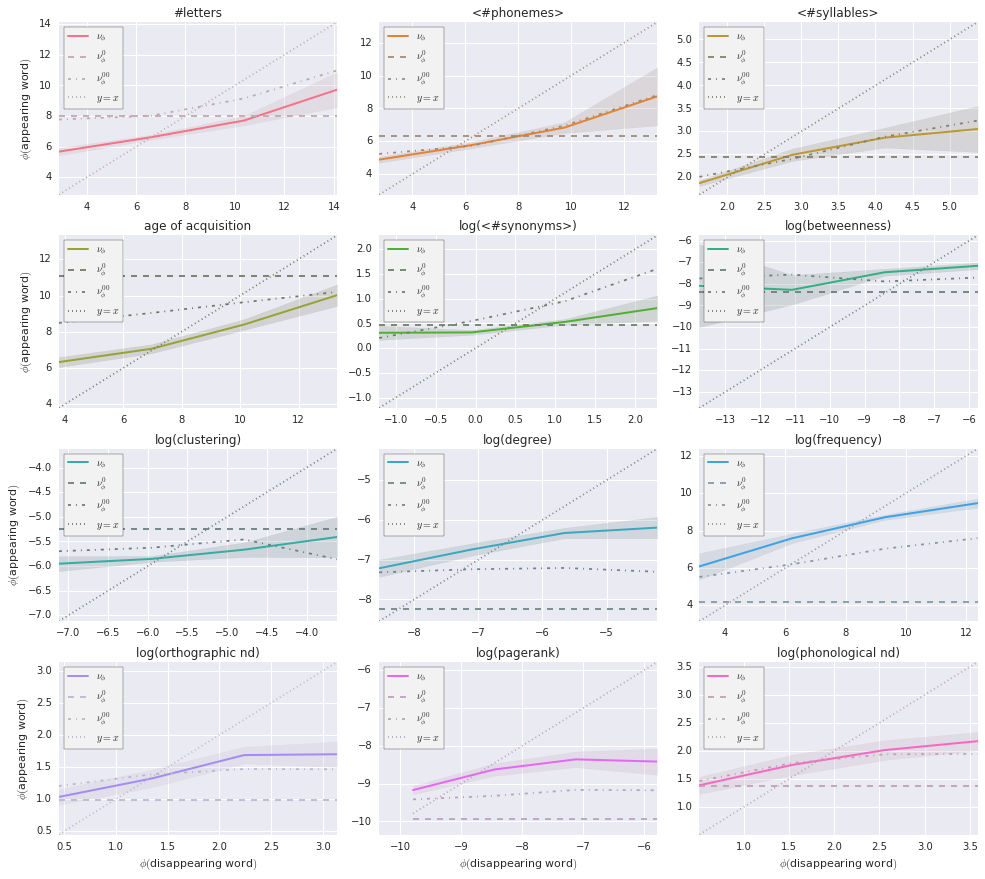

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

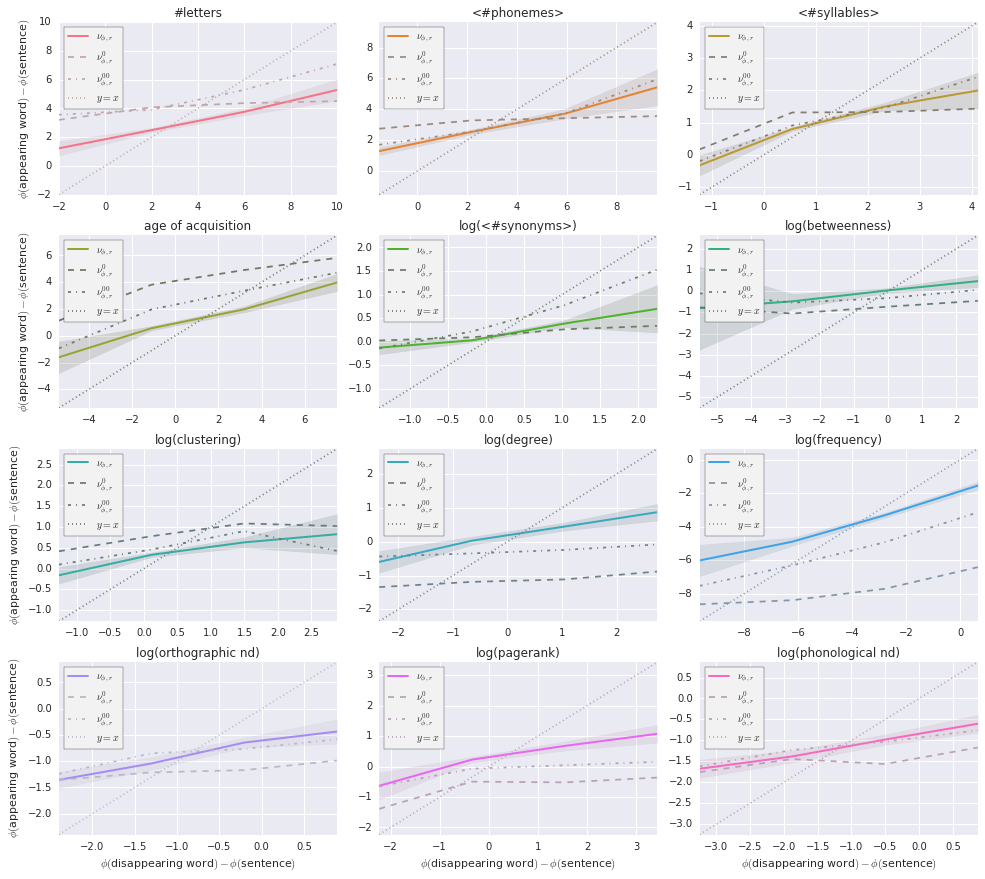

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

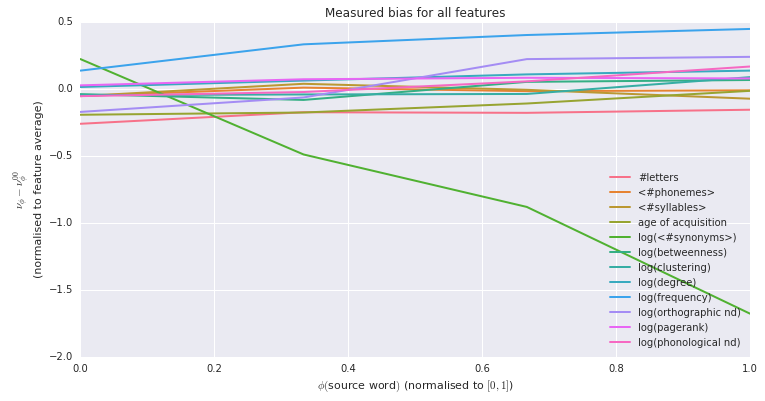

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

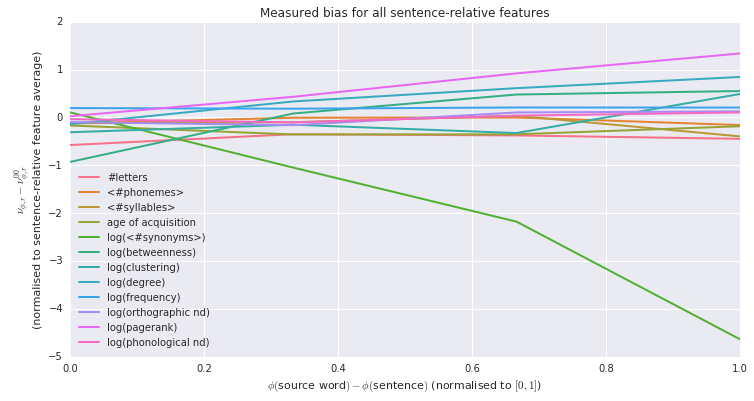

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

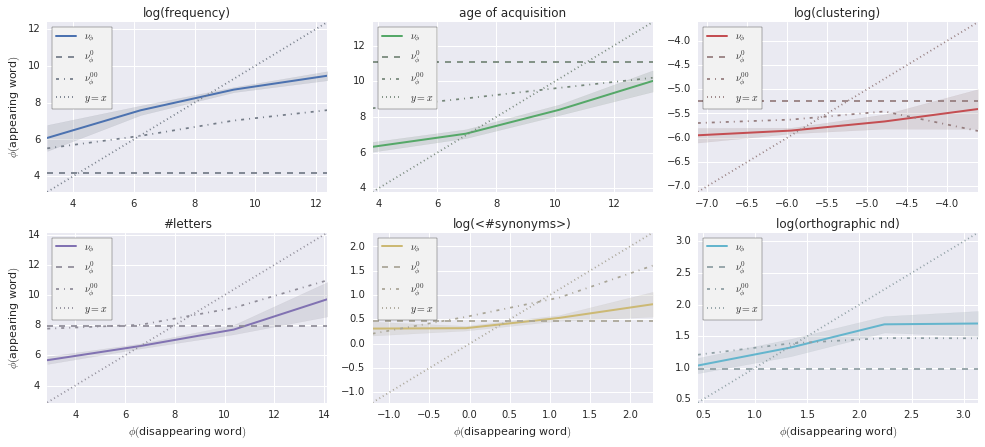

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

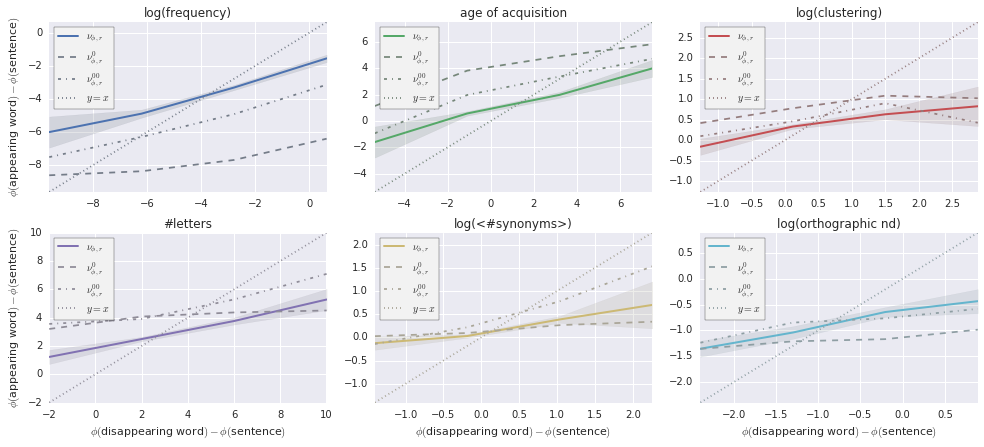

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

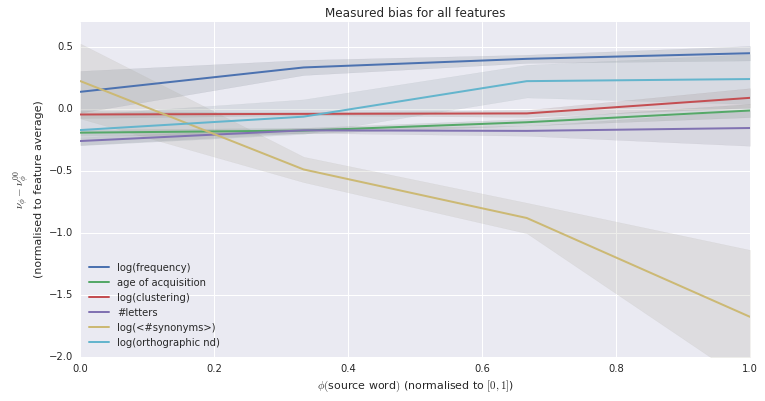

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

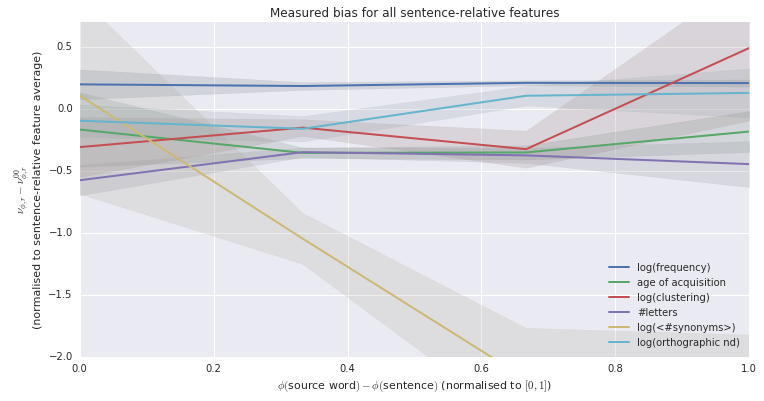

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


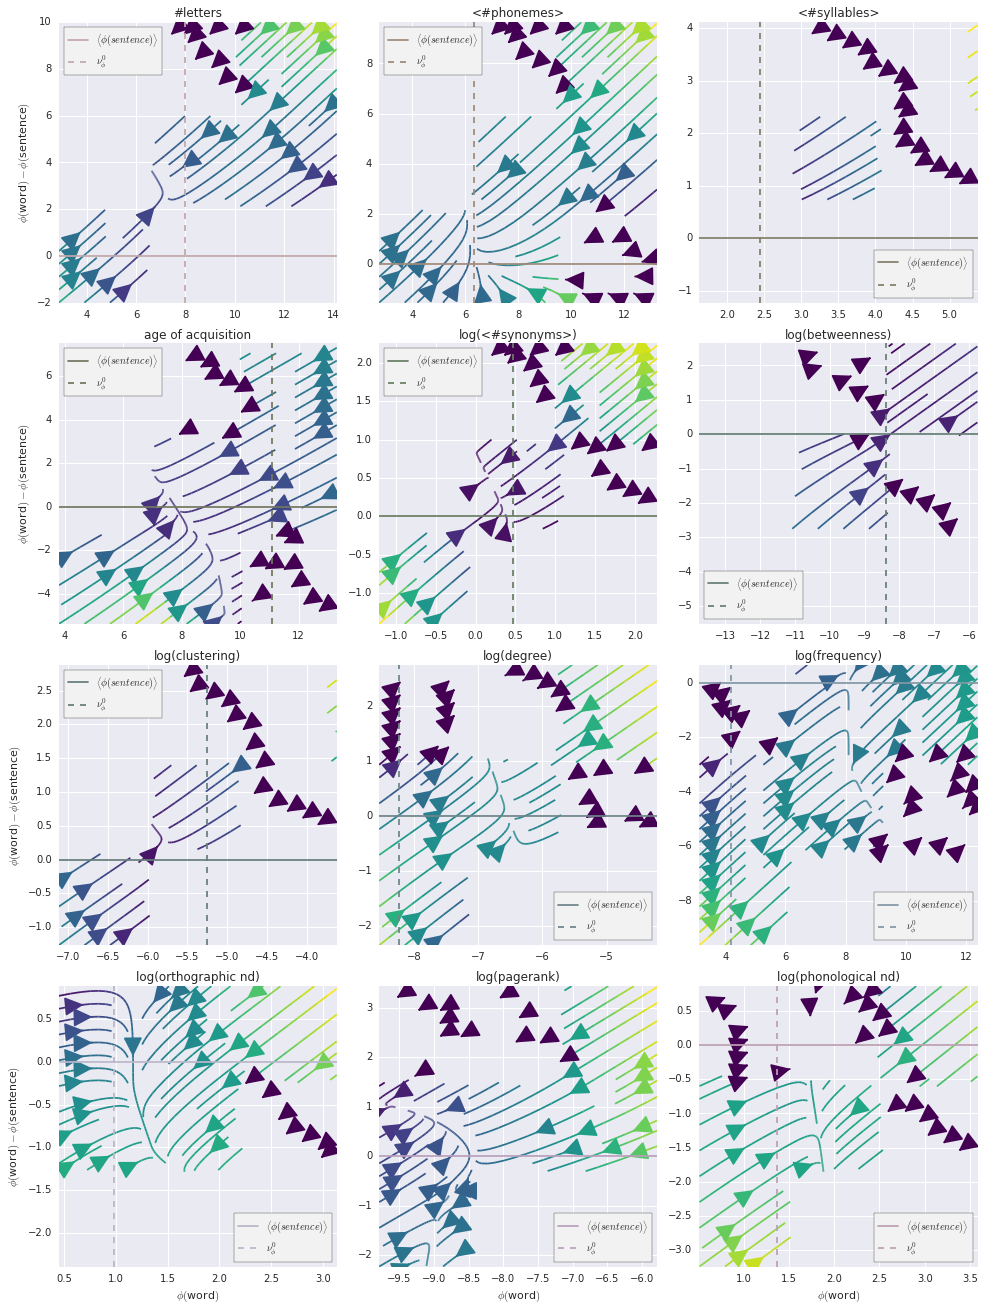

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


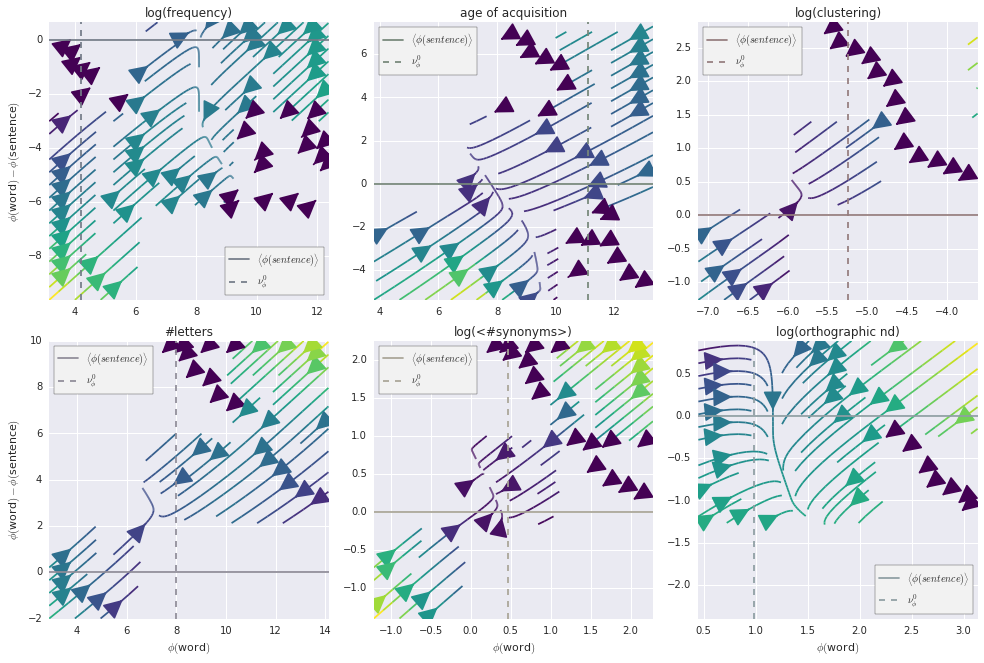

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51883359  0.17669627  0.08809876  0.07560421  0.03351194  0.03065203
  0.02045056  0.01842199  0.01653143  0.00905972  0.00708229]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.460035,0.294309,-0.080351,0.242819,0.251189,-0.423327,0.231254,0.293679,-0.385656,0.288869,-0.148677,-0.004981
Component-1,-0.267175,0.391237,-0.128128,0.292395,0.300066,0.422706,-0.184051,0.307558,0.427101,-0.258132,0.163940,-0.023005
Component-2,0.731442,0.203110,-0.124015,0.052172,0.612995,-0.126826,-0.019336,0.001283,-0.062920,0.080944,-0.017522,-0.050959


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 14485) |           | Elapsed Time: 0:01:06 ETA:  11 days, 2:12:28

  0% (   66 of 14485) |                    | Elapsed Time: 0:01:07 ETA:  0:02:36

  1% (  147 of 14485) |                    | Elapsed Time: 0:01:08 ETA:  0:02:11

  1% (  182 of 14485) |                    | Elapsed Time: 0:01:08 ETA:  0:02:06

  1% (  248 of 14485) |                    | Elapsed Time: 0:01:09 ETA:  0:02:12

  2% (  320 of 14485) |                    | Elapsed Time: 0:01:10 ETA:  0:02:11

  2% (  363 of 14485) |                    | Elapsed Time: 0:01:11 ETA:  0:02:13

  2% (  425 of 14485) |                    | Elapsed Time: 0:01:12 ETA:  0:02:16

  3% (  484 of 14485) |                    | Elapsed Time: 0:01:13 ETA:  0:02:20

  3% (  544 of 14485) |                    | Elapsed Time: 0:01:14 ETA:  0:02:18

  4% (  620 of 14485) |                    | Elapsed Time: 0:01:15 ETA:  0:02:13

  4% (  698 of 14485) |                    | Elapsed Time: 0:01:16 ETA:  0:02:13

  5% (  725 of 14485) |#                   | Elapsed Time: 0:01:16 ETA:  0:02:17

  5% (  783 of 14485) |#                   | Elapsed Time: 0:01:17 ETA:  0:02:19

  5% (  838 of 14485) |#                   | Elapsed Time: 0:01:18 ETA:  0:02:24

  6% (  906 of 14485) |#                   | Elapsed Time: 0:01:19 ETA:  0:02:21

  6% (  962 of 14485) |#                   | Elapsed Time: 0:01:20 ETA:  0:02:23

  7% ( 1027 of 14485) |#                   | Elapsed Time: 0:01:21 ETA:  0:02:19

  7% ( 1087 of 14485) |#                   | Elapsed Time: 0:01:22 ETA:  0:02:15

  8% ( 1171 of 14485) |#                   | Elapsed Time: 0:01:23 ETA:  0:02:11

  8% ( 1268 of 14485) |#                   | Elapsed Time: 0:01:24 ETA:  0:02:04

  9% ( 1320 of 14485) |#                   | Elapsed Time: 0:01:25 ETA:  0:02:06

  9% ( 1381 of 14485) |#                   | Elapsed Time: 0:01:26 ETA:  0:02:03

 10% ( 1449 of 14485) |##                  | Elapsed Time: 0:01:27 ETA:  0:01:59

 10% ( 1518 of 14485) |##                  | Elapsed Time: 0:01:28 ETA:  0:01:56

 11% ( 1600 of 14485) |##                  | Elapsed Time: 0:01:29 ETA:  0:01:54

 11% ( 1630 of 14485) |##                  | Elapsed Time: 0:01:29 ETA:  0:01:57

 11% ( 1708 of 14485) |##                  | Elapsed Time: 0:01:30 ETA:  0:02:00

 12% ( 1770 of 14485) |##                  | Elapsed Time: 0:01:31 ETA:  0:02:03

 12% ( 1811 of 14485) |##                  | Elapsed Time: 0:01:32 ETA:  0:02:01

 12% ( 1862 of 14485) |##                  | Elapsed Time: 0:01:33 ETA:  0:02:05

 13% ( 1938 of 14485) |##                  | Elapsed Time: 0:01:34 ETA:  0:01:59

 13% ( 1992 of 14485) |##                  | Elapsed Time: 0:01:35 ETA:  0:01:57

 14% ( 2076 of 14485) |##                  | Elapsed Time: 0:01:36 ETA:  0:01:50

 14% ( 2156 of 14485) |##                  | Elapsed Time: 0:01:37 ETA:  0:01:50

 15% ( 2173 of 14485) |###                 | Elapsed Time: 0:01:37 ETA:  0:01:51

 15% ( 2230 of 14485) |###                 | Elapsed Time: 0:01:38 ETA:  0:01:58

 15% ( 2298 of 14485) |###                 | Elapsed Time: 0:01:39 ETA:  0:01:54

 16% ( 2354 of 14485) |###                 | Elapsed Time: 0:01:40 ETA:  0:01:46

 16% ( 2397 of 14485) |###                 | Elapsed Time: 0:01:41 ETA:  0:01:48

 17% ( 2473 of 14485) |###                 | Elapsed Time: 0:01:42 ETA:  0:01:47

 17% ( 2535 of 14485) |###                 | Elapsed Time: 0:01:43 ETA:  0:01:45

 17% ( 2607 of 14485) |###                 | Elapsed Time: 0:01:44 ETA:  0:01:48

 18% ( 2689 of 14485) |###                 | Elapsed Time: 0:01:45 ETA:  0:01:46

 18% ( 2716 of 14485) |###                 | Elapsed Time: 0:01:45 ETA:  0:01:46

 19% ( 2776 of 14485) |###                 | Elapsed Time: 0:01:46 ETA:  0:01:44

 19% ( 2826 of 14485) |###                 | Elapsed Time: 0:01:47 ETA:  0:01:50

 20% ( 2897 of 14485) |####                | Elapsed Time: 0:01:48 ETA:  0:01:47

 20% ( 2981 of 14485) |####                | Elapsed Time: 0:01:49 ETA:  0:01:31

 21% ( 3064 of 14485) |####                | Elapsed Time: 0:01:50 ETA:  0:01:28

 21% ( 3079 of 14485) |####                | Elapsed Time: 0:01:50 ETA:  0:01:30

 21% ( 3146 of 14485) |####                | Elapsed Time: 0:01:51 ETA:  0:01:31

 22% ( 3208 of 14485) |####                | Elapsed Time: 0:01:52 ETA:  0:01:38

 22% ( 3260 of 14485) |####                | Elapsed Time: 0:01:53 ETA:  0:01:39

 23% ( 3335 of 14485) |####                | Elapsed Time: 0:01:54 ETA:  0:01:32

 23% ( 3416 of 14485) |####                | Elapsed Time: 0:01:55 ETA:  0:01:20

 23% ( 3441 of 14485) |####                | Elapsed Time: 0:01:56 ETA:  0:01:21

 24% ( 3509 of 14485) |####                | Elapsed Time: 0:01:57 ETA:  0:01:26

 24% ( 3572 of 14485) |####                | Elapsed Time: 0:01:58 ETA:  0:01:34

 25% ( 3622 of 14485) |#####               | Elapsed Time: 0:01:58 ETA:  0:01:30

 25% ( 3702 of 14485) |#####               | Elapsed Time: 0:01:59 ETA:  0:01:24

 26% ( 3774 of 14485) |#####               | Elapsed Time: 0:02:00 ETA:  0:01:20

 26% ( 3803 of 14485) |#####               | Elapsed Time: 0:02:01 ETA:  0:01:18

 26% ( 3878 of 14485) |#####               | Elapsed Time: 0:02:02 ETA:  0:01:18

 27% ( 3954 of 14485) |#####               | Elapsed Time: 0:02:03 ETA:  0:01:19

 27% ( 3984 of 14485) |#####               | Elapsed Time: 0:02:03 ETA:  0:01:19

 27% ( 4050 of 14485) |#####               | Elapsed Time: 0:02:04 ETA:  0:01:19

 28% ( 4115 of 14485) |#####               | Elapsed Time: 0:02:05 ETA:  0:01:17

 28% ( 4165 of 14485) |#####               | Elapsed Time: 0:02:06 ETA:  0:01:17

 29% ( 4243 of 14485) |#####               | Elapsed Time: 0:02:07 ETA:  0:01:17

 29% ( 4314 of 14485) |#####               | Elapsed Time: 0:02:08 ETA:  0:01:16

 30% ( 4346 of 14485) |######              | Elapsed Time: 0:02:08 ETA:  0:01:15

 30% ( 4418 of 14485) |######              | Elapsed Time: 0:02:09 ETA:  0:01:14

 30% ( 4475 of 14485) |######              | Elapsed Time: 0:02:10 ETA:  0:01:21

 31% ( 4527 of 14485) |######              | Elapsed Time: 0:02:12 ETA:  0:01:31

 31% ( 4596 of 14485) |######              | Elapsed Time: 0:02:13 ETA:  0:01:28

 32% ( 4667 of 14485) |######              | Elapsed Time: 0:02:14 ETA:  0:01:28

 32% ( 4708 of 14485) |######              | Elapsed Time: 0:02:14 ETA:  0:01:33

 32% ( 4770 of 14485) |######              | Elapsed Time: 0:02:15 ETA:  0:01:37

 33% ( 4838 of 14485) |######              | Elapsed Time: 0:02:16 ETA:  0:01:36

 33% ( 4889 of 14485) |######              | Elapsed Time: 0:02:17 ETA:  0:01:48

 34% ( 4962 of 14485) |######              | Elapsed Time: 0:02:18 ETA:  0:01:29

 34% ( 5041 of 14485) |######              | Elapsed Time: 0:02:19 ETA:  0:01:20

 35% ( 5070 of 14485) |#######             | Elapsed Time: 0:02:20 ETA:  0:01:21

 35% ( 5154 of 14485) |#######             | Elapsed Time: 0:02:21 ETA:  0:01:14

 35% ( 5213 of 14485) |#######             | Elapsed Time: 0:02:22 ETA:  0:01:16

 36% ( 5251 of 14485) |#######             | Elapsed Time: 0:02:22 ETA:  0:01:11

 36% ( 5311 of 14485) |#######             | Elapsed Time: 0:02:23 ETA:  0:01:14

 37% ( 5364 of 14485) |#######             | Elapsed Time: 0:02:24 ETA:  0:01:08

 37% ( 5432 of 14485) |#######             | Elapsed Time: 0:02:25 ETA:  0:01:09

 37% ( 5498 of 14485) |#######             | Elapsed Time: 0:02:26 ETA:  0:01:15

 38% ( 5570 of 14485) |#######             | Elapsed Time: 0:02:27 ETA:  0:01:11

 38% ( 5613 of 14485) |#######             | Elapsed Time: 0:02:28 ETA:  0:01:20

 39% ( 5653 of 14485) |#######             | Elapsed Time: 0:02:29 ETA:  0:01:30

 39% ( 5721 of 14485) |#######             | Elapsed Time: 0:02:30 ETA:  0:01:30

 40% ( 5794 of 14485) |########            | Elapsed Time: 0:02:31 ETA:  0:01:19

 40% ( 5873 of 14485) |########            | Elapsed Time: 0:02:32 ETA:  0:01:06

 41% ( 5949 of 14485) |########            | Elapsed Time: 0:02:33 ETA:  0:01:01

 41% ( 5976 of 14485) |########            | Elapsed Time: 0:02:33 ETA:  0:00:58

 41% ( 6047 of 14485) |########            | Elapsed Time: 0:02:34 ETA:  0:00:55

 42% ( 6128 of 14485) |########            | Elapsed Time: 0:02:35 ETA:  0:00:51

 42% ( 6157 of 14485) |########            | Elapsed Time: 0:02:36 ETA:  0:00:48

 42% ( 6227 of 14485) |########            | Elapsed Time: 0:02:37 ETA:  0:00:36

 43% ( 6303 of 14485) |########            | Elapsed Time: 0:02:38 ETA:  0:00:33

 43% ( 6338 of 14485) |########            | Elapsed Time: 0:02:38 ETA:  0:00:37

 44% ( 6404 of 14485) |########            | Elapsed Time: 0:02:39 ETA:  0:00:41

 44% ( 6458 of 14485) |########            | Elapsed Time: 0:02:40 ETA:  0:00:48

 45% ( 6519 of 14485) |#########           | Elapsed Time: 0:02:41 ETA:  0:00:46

 45% ( 6595 of 14485) |#########           | Elapsed Time: 0:02:42 ETA:  0:00:43

 46% ( 6669 of 14485) |#########           | Elapsed Time: 0:02:43 ETA:  0:00:45

 46% ( 6700 of 14485) |#########           | Elapsed Time: 0:02:44 ETA:  0:00:41

 46% ( 6769 of 14485) |#########           | Elapsed Time: 0:02:45 ETA:  0:00:40

 47% ( 6836 of 14485) |#########           | Elapsed Time: 0:02:46 ETA:  0:00:43

 47% ( 6881 of 14485) |#########           | Elapsed Time: 0:02:46 ETA:  0:00:39

 47% ( 6945 of 14485) |#########           | Elapsed Time: 0:02:47 ETA:  0:00:39

 48% ( 7002 of 14485) |#########           | Elapsed Time: 0:02:48 ETA:  0:00:37

 48% ( 7062 of 14485) |#########           | Elapsed Time: 0:02:49 ETA:  0:00:37

 49% ( 7142 of 14485) |#########           | Elapsed Time: 0:02:50 ETA:  0:00:34

 49% ( 7218 of 14485) |#########           | Elapsed Time: 0:02:51 ETA:  0:00:33

 50% ( 7243 of 14485) |##########          | Elapsed Time: 0:02:51 ETA:  0:00:35

 50% ( 7314 of 14485) |##########          | Elapsed Time: 0:02:52 ETA:  0:00:33

 51% ( 7394 of 14485) |##########          | Elapsed Time: 0:02:53 ETA:  0:00:27

 51% ( 7424 of 14485) |##########          | Elapsed Time: 0:02:54 ETA:  0:00:30

 51% ( 7480 of 14485) |##########          | Elapsed Time: 0:02:55 ETA:  0:00:32

 52% ( 7566 of 14485) |##########          | Elapsed Time: 0:02:56 ETA:  0:00:20

 52% ( 7605 of 14485) |##########          | Elapsed Time: 0:02:56 ETA:  0:00:21

 53% ( 7686 of 14485) |##########          | Elapsed Time: 0:02:57 ETA:  0:00:19

 53% ( 7733 of 14485) |##########          | Elapsed Time: 0:02:58 ETA:  0:00:29

 53% ( 7786 of 14485) |##########          | Elapsed Time: 0:02:59 ETA:  0:00:31

 54% ( 7858 of 14485) |##########          | Elapsed Time: 0:03:00 ETA:  0:00:29

 54% ( 7928 of 14485) |##########          | Elapsed Time: 0:03:01 ETA:  0:00:33

 55% ( 7967 of 14485) |###########         | Elapsed Time: 0:03:02 ETA:  0:00:32

 55% ( 8051 of 14485) |###########         | Elapsed Time: 0:03:03 ETA:  0:00:20

 56% ( 8148 of 14485) |###########         | Elapsed Time: 0:03:04 ETA:  0:00:21

 56% ( 8215 of 14485) |###########         | Elapsed Time: 0:03:05 ETA:  0:00:25

 57% ( 8285 of 14485) |###########         | Elapsed Time: 0:03:06 ETA:  0:00:16

 57% ( 8329 of 14485) |###########         | Elapsed Time: 0:03:07 ETA:  0:00:13

 58% ( 8411 of 14485) |###########         | Elapsed Time: 0:03:08 ETA:  0:00:08

 58% ( 8471 of 14485) |###########         | Elapsed Time: 0:03:09 ETA:  0:00:11

 58% ( 8510 of 14485) |###########         | Elapsed Time: 0:03:09 ETA:  0:00:06

 59% ( 8583 of 14485) |###########         | Elapsed Time: 0:03:10 ETA:  0:00:09

 59% ( 8669 of 14485) |###########         | Elapsed Time: 0:03:11 ETA:  0:00:09

 60% ( 8691 of 14485) |############        | Elapsed Time: 0:03:12 ETA:  0:00:07

 60% ( 8767 of 14485) |############        | Elapsed Time: 0:03:13 ETA:  0:00:03

 61% ( 8849 of 14485) |############        | Elapsed Time: 0:03:14 ETA:  0:00:00

 61% ( 8873 of 14485) |############        | Elapsed Time: 0:03:14 ETA:  0:00:00

 61% ( 8963 of 14485) |############        | Elapsed Time: 0:03:15 ETA:  0:00:00

 62% ( 9054 of 14485) |############        | Elapsed Time: 0:03:16 ETA:  0:00:00

 62% ( 9121 of 14485) |############        | Elapsed Time: 0:03:17 ETA:  0:00:00

 63% ( 9185 of 14485) |############        | Elapsed Time: 0:03:18 ETA:  0:00:00

 63% ( 9235 of 14485) |############        | Elapsed Time: 0:03:19 ETA:  0:00:00

 64% ( 9295 of 14485) |############        | Elapsed Time: 0:03:20 ETA:  0:00:00

 64% ( 9352 of 14485) |############        | Elapsed Time: 0:03:21 ETA:  0:00:09

 65% ( 9416 of 14485) |#############       | Elapsed Time: 0:03:22 ETA:  0:00:10

 65% ( 9479 of 14485) |#############       | Elapsed Time: 0:03:23 ETA:  0:00:20

 65% ( 9549 of 14485) |#############       | Elapsed Time: 0:03:24 ETA:  0:00:23

 66% ( 9597 of 14485) |#############       | Elapsed Time: 0:03:25 ETA:  0:00:19

 66% ( 9668 of 14485) |#############       | Elapsed Time: 0:03:26 ETA:  0:00:17

 67% ( 9742 of 14485) |#############       | Elapsed Time: 0:03:27 ETA:  0:00:12

 67% ( 9778 of 14485) |#############       | Elapsed Time: 0:03:27 ETA:  0:00:11

 67% ( 9849 of 14485) |#############       | Elapsed Time: 0:03:28 ETA:  0:00:06

 68% ( 9921 of 14485) |#############       | Elapsed Time: 0:03:29 ETA:  0:00:00

 68% ( 9959 of 14485) |#############       | Elapsed Time: 0:03:30 ETA:  0:00:00

 69% (10029 of 14485) |#############       | Elapsed Time: 0:03:31 ETA:  0:00:00

 69% (10088 of 14485) |#############       | Elapsed Time: 0:03:32 ETA:  0:00:00

 70% (10140 of 14485) |##############      | Elapsed Time: 0:03:33 ETA:  0:00:00

 70% (10200 of 14485) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:04

 70% (10268 of 14485) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:05

 71% (10321 of 14485) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:02

 71% (10378 of 14485) |##############      | Elapsed Time: 0:03:36 ETA:  0:00:07

 72% (10439 of 14485) |##############      | Elapsed Time: 0:03:37 ETA:  0:00:11

 72% (10502 of 14485) |##############      | Elapsed Time: 0:03:38 ETA:  0:00:08

 72% (10553 of 14485) |##############      | Elapsed Time: 0:03:39 ETA:  0:00:15

 73% (10620 of 14485) |##############      | Elapsed Time: 0:03:40 ETA:  0:00:10

 73% (10683 of 14485) |##############      | Elapsed Time: 0:03:41 ETA:  0:00:10

 74% (10741 of 14485) |##############      | Elapsed Time: 0:03:42 ETA:  0:00:10

 74% (10800 of 14485) |##############      | Elapsed Time: 0:03:43 ETA:  0:00:13

 75% (10864 of 14485) |###############     | Elapsed Time: 0:03:44 ETA:  0:00:13

 75% (10939 of 14485) |###############     | Elapsed Time: 0:03:45 ETA:  0:00:04

 76% (11010 of 14485) |###############     | Elapsed Time: 0:03:46 ETA:  0:00:00

 76% (11045 of 14485) |###############     | Elapsed Time: 0:03:47 ETA:  0:00:01

 76% (11115 of 14485) |###############     | Elapsed Time: 0:03:48 ETA:  0:00:00

 77% (11163 of 14485) |###############     | Elapsed Time: 0:03:49 ETA:  0:00:00

 77% (11226 of 14485) |###############     | Elapsed Time: 0:03:50 ETA:  0:00:00

 77% (11294 of 14485) |###############     | Elapsed Time: 0:03:51 ETA:  0:00:00

 78% (11349 of 14485) |###############     | Elapsed Time: 0:03:52 ETA:  0:00:00

 78% (11407 of 14485) |###############     | Elapsed Time: 0:03:52 ETA:  0:00:00

 79% (11476 of 14485) |###############     | Elapsed Time: 0:03:53 ETA:  0:00:00

 79% (11553 of 14485) |###############     | Elapsed Time: 0:03:54 ETA:  0:00:00

 80% (11588 of 14485) |################    | Elapsed Time: 0:03:55 ETA:  0:00:00

 80% (11657 of 14485) |################    | Elapsed Time: 0:03:56 ETA:  0:00:00

 80% (11724 of 14485) |################    | Elapsed Time: 0:03:57 ETA:  0:00:00

 81% (11770 of 14485) |################    | Elapsed Time: 0:03:58 ETA:  0:00:00

 81% (11833 of 14485) |################    | Elapsed Time: 0:03:59 ETA:  0:00:00

 82% (11900 of 14485) |################    | Elapsed Time: 0:04:00 ETA:  0:00:00

 82% (11951 of 14485) |################    | Elapsed Time: 0:04:01 ETA:  0:00:00

 82% (12020 of 14485) |################    | Elapsed Time: 0:04:02 ETA:  0:00:00

 83% (12082 of 14485) |################    | Elapsed Time: 0:04:03 ETA:  0:00:00

 83% (12132 of 14485) |################    | Elapsed Time: 0:04:04 ETA:  0:00:00

 84% (12195 of 14485) |################    | Elapsed Time: 0:04:05 ETA:  0:00:00

 84% (12280 of 14485) |################    | Elapsed Time: 0:04:06 ETA:  0:00:00

 85% (12313 of 14485) |#################   | Elapsed Time: 0:04:06 ETA:  0:00:00

 85% (12402 of 14485) |#################   | Elapsed Time: 0:04:07 ETA:  0:00:00

 86% (12494 of 14485) |#################   | Elapsed Time: 0:04:08 ETA:  0:00:00

 86% (12595 of 14485) |#################   | Elapsed Time: 0:04:09 ETA:  0:00:00

 87% (12675 of 14485) |#################   | Elapsed Time: 0:04:10 ETA:  0:00:00

 88% (12762 of 14485) |#################   | Elapsed Time: 0:04:11 ETA:  0:00:00

 88% (12856 of 14485) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:00

 89% (12939 of 14485) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:00

 90% (13037 of 14485) |##################  | Elapsed Time: 0:04:14 ETA:  0:00:00

 90% (13135 of 14485) |##################  | Elapsed Time: 0:04:15 ETA:  0:00:00

 91% (13218 of 14485) |##################  | Elapsed Time: 0:04:16 ETA:  0:00:00

 91% (13300 of 14485) |##################  | Elapsed Time: 0:04:17 ETA:  0:00:00

 92% (13399 of 14485) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:00

 93% (13504 of 14485) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:00

 93% (13580 of 14485) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:00

 94% (13675 of 14485) |##################  | Elapsed Time: 0:04:21 ETA:  0:00:00

 95% (13761 of 14485) |################### | Elapsed Time: 0:04:22 ETA:  0:00:00

 95% (13831 of 14485) |################### | Elapsed Time: 0:04:23 ETA:  0:00:00

 96% (13914 of 14485) |################### | Elapsed Time: 0:04:24 ETA:  0:00:00

 96% (13942 of 14485) |################### | Elapsed Time: 0:04:25 ETA:  0:00:00

 96% (14032 of 14485) |################### | Elapsed Time: 0:04:26 ETA:  0:00:00

 97% (14123 of 14485) |################### | Elapsed Time: 0:04:27 ETA:  0:00:00

 98% (14204 of 14485) |################### | Elapsed Time: 0:04:28 ETA:  0:00:00

 98% (14304 of 14485) |################### | Elapsed Time: 0:04:29 ETA:  0:00:00

 99% (14402 of 14485) |################### | Elapsed Time: 0:04:30 ETA:  0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:04:31 Time: 0:04:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

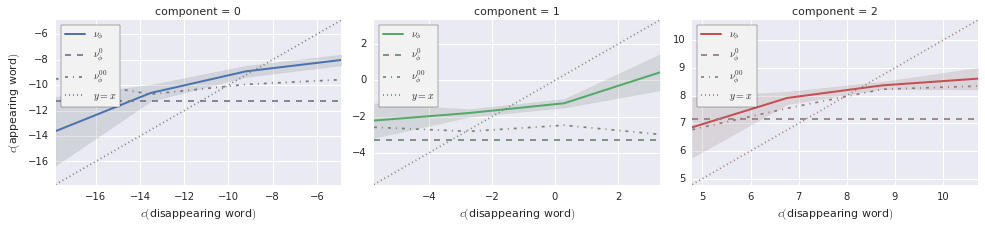

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.54948658  0.18093776  0.16006821  0.04388229]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.684374,-0.089142,0.369508,-0.547619,0.295402,0.000341
Component-1,0.291034,0.113954,-0.628715,-0.651601,0.287135,-0.001178
Component-2,-0.662062,0.085969,-0.663048,0.327614,-0.071232,0.047387


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 14485) |           | Elapsed Time: 0:00:15 ETA:  2 days, 13:04:56

  0% (   66 of 14485) |                    | Elapsed Time: 0:00:16 ETA:  0:03:27

  1% (  182 of 14485) |                    | Elapsed Time: 0:00:17 ETA:  0:02:37

  1% (  275 of 14485) |                    | Elapsed Time: 0:00:18 ETA:  0:02:30

  2% (  363 of 14485) |                    | Elapsed Time: 0:00:19 ETA:  0:02:29

  3% (  451 of 14485) |                    | Elapsed Time: 0:00:20 ETA:  0:02:27

  3% (  525 of 14485) |                    | Elapsed Time: 0:00:21 ETA:  0:02:30

  3% (  544 of 14485) |                    | Elapsed Time: 0:00:21 ETA:  0:02:31

  4% (  631 of 14485) |                    | Elapsed Time: 0:00:22 ETA:  0:02:24

  4% (  713 of 14485) |                    | Elapsed Time: 0:00:23 ETA:  0:02:27

  5% (  725 of 14485) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:31

  5% (  795 of 14485) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:37

  6% (  906 of 14485) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:32

  6% (  989 of 14485) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:32

  7% ( 1087 of 14485) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:23

  8% ( 1202 of 14485) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:13

  8% ( 1268 of 14485) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:12

  9% ( 1341 of 14485) |#                   | Elapsed Time: 0:00:30 ETA:  0:02:13

  9% ( 1417 of 14485) |#                   | Elapsed Time: 0:00:31 ETA:  0:02:13

 10% ( 1449 of 14485) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:08

 10% ( 1554 of 14485) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:05

 11% ( 1630 of 14485) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:03

 12% ( 1741 of 14485) |##                  | Elapsed Time: 0:00:34 ETA:  0:01:56

 12% ( 1811 of 14485) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:00

 13% ( 1886 of 14485) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:08

 13% ( 1992 of 14485) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:03

 14% ( 2099 of 14485) |##                  | Elapsed Time: 0:00:38 ETA:  0:01:54

 15% ( 2173 of 14485) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:47

 15% ( 2271 of 14485) |###                 | Elapsed Time: 0:00:40 ETA:  0:01:46

 16% ( 2354 of 14485) |###                 | Elapsed Time: 0:00:41 ETA:  0:01:45

 16% ( 2442 of 14485) |###                 | Elapsed Time: 0:00:42 ETA:  0:01:47

 17% ( 2535 of 14485) |###                 | Elapsed Time: 0:00:43 ETA:  0:01:49

 18% ( 2622 of 14485) |###                 | Elapsed Time: 0:00:44 ETA:  0:01:46

 18% ( 2716 of 14485) |###                 | Elapsed Time: 0:00:45 ETA:  0:01:39

 19% ( 2790 of 14485) |###                 | Elapsed Time: 0:00:46 ETA:  0:01:44

 20% ( 2897 of 14485) |####                | Elapsed Time: 0:00:47 ETA:  0:01:50

 20% ( 3016 of 14485) |####                | Elapsed Time: 0:00:48 ETA:  0:01:44

 21% ( 3079 of 14485) |####                | Elapsed Time: 0:00:48 ETA:  0:01:44

 21% ( 3180 of 14485) |####                | Elapsed Time: 0:00:50 ETA:  0:01:40

 22% ( 3260 of 14485) |####                | Elapsed Time: 0:00:50 ETA:  0:01:39

 23% ( 3375 of 14485) |####                | Elapsed Time: 0:00:51 ETA:  0:01:32

 23% ( 3441 of 14485) |####                | Elapsed Time: 0:00:52 ETA:  0:01:31

 24% ( 3535 of 14485) |####                | Elapsed Time: 0:00:53 ETA:  0:01:26

 25% ( 3622 of 14485) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:22

 25% ( 3731 of 14485) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:21

 26% ( 3803 of 14485) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:22

 27% ( 3919 of 14485) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:20

 27% ( 3984 of 14485) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:18

 28% ( 4090 of 14485) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:17

 28% ( 4165 of 14485) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:17

 29% ( 4272 of 14485) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:17

 30% ( 4346 of 14485) |######              | Elapsed Time: 0:01:00 ETA:  0:01:14

 30% ( 4443 of 14485) |######              | Elapsed Time: 0:01:02 ETA:  0:01:14

 31% ( 4496 of 14485) |######              | Elapsed Time: 0:01:03 ETA:  0:01:24

 31% ( 4527 of 14485) |######              | Elapsed Time: 0:01:03 ETA:  0:01:29

 31% ( 4605 of 14485) |######              | Elapsed Time: 0:01:04 ETA:  0:01:36

 32% ( 4708 of 14485) |######              | Elapsed Time: 0:01:05 ETA:  0:01:41

 33% ( 4801 of 14485) |######              | Elapsed Time: 0:01:06 ETA:  0:01:42

 33% ( 4889 of 14485) |######              | Elapsed Time: 0:01:07 ETA:  0:01:51

 34% ( 4973 of 14485) |######              | Elapsed Time: 0:01:08 ETA:  0:01:55

 35% ( 5070 of 14485) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:38

 35% ( 5176 of 14485) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:27

 36% ( 5251 of 14485) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:21

 36% ( 5344 of 14485) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:20

 37% ( 5432 of 14485) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:19

 38% ( 5522 of 14485) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:19

 38% ( 5613 of 14485) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:15

 39% ( 5684 of 14485) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:19

 40% ( 5794 of 14485) |########            | Elapsed Time: 0:01:17 ETA:  0:01:16

 40% ( 5905 of 14485) |########            | Elapsed Time: 0:01:18 ETA:  0:01:14

 41% ( 5976 of 14485) |########            | Elapsed Time: 0:01:19 ETA:  0:01:13

 41% ( 6079 of 14485) |########            | Elapsed Time: 0:01:20 ETA:  0:01:10

 42% ( 6157 of 14485) |########            | Elapsed Time: 0:01:20 ETA:  0:01:08

 43% ( 6256 of 14485) |########            | Elapsed Time: 0:01:21 ETA:  0:01:05

 43% ( 6338 of 14485) |########            | Elapsed Time: 0:01:22 ETA:  0:01:05

 44% ( 6431 of 14485) |########            | Elapsed Time: 0:01:23 ETA:  0:01:00

 45% ( 6519 of 14485) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:05

 45% ( 6624 of 14485) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:05

 46% ( 6700 of 14485) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:04

 46% ( 6799 of 14485) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:04

 47% ( 6881 of 14485) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:01

 48% ( 6967 of 14485) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:03

 48% ( 7062 of 14485) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:01

 49% ( 7173 of 14485) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:57

 50% ( 7243 of 14485) |##########          | Elapsed Time: 0:01:32 ETA:  0:00:50

 50% ( 7349 of 14485) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:49

 51% ( 7424 of 14485) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:48

 51% ( 7526 of 14485) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:47

 52% ( 7605 of 14485) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:44

 53% ( 7716 of 14485) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:43

 53% ( 7786 of 14485) |##########          | Elapsed Time: 0:01:37 ETA:  0:00:42

 54% ( 7894 of 14485) |##########          | Elapsed Time: 0:01:38 ETA:  0:00:40

 55% ( 7967 of 14485) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:41

 55% ( 8086 of 14485) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:37

 56% ( 8148 of 14485) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:36

 56% ( 8243 of 14485) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:38

 57% ( 8329 of 14485) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:39

 58% ( 8427 of 14485) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:40

 58% ( 8510 of 14485) |###########         | Elapsed Time: 0:01:44 ETA:  0:00:42

 59% ( 8626 of 14485) |###########         | Elapsed Time: 0:01:45 ETA:  0:00:35

 60% ( 8691 of 14485) |############        | Elapsed Time: 0:01:46 ETA:  0:00:34

 60% ( 8801 of 14485) |############        | Elapsed Time: 0:01:47 ETA:  0:00:31

 61% ( 8873 of 14485) |############        | Elapsed Time: 0:01:47 ETA:  0:00:33

 62% ( 8989 of 14485) |############        | Elapsed Time: 0:01:48 ETA:  0:00:30

 62% ( 9054 of 14485) |############        | Elapsed Time: 0:01:49 ETA:  0:00:27

 63% ( 9150 of 14485) |############        | Elapsed Time: 0:01:50 ETA:  0:00:25

 63% ( 9235 of 14485) |############        | Elapsed Time: 0:01:51 ETA:  0:00:25

 64% ( 9340 of 14485) |############        | Elapsed Time: 0:01:52 ETA:  0:00:26

 65% ( 9416 of 14485) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:26

 65% ( 9522 of 14485) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:26

 66% ( 9597 of 14485) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:25

 66% ( 9701 of 14485) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:27

 67% ( 9778 of 14485) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:26

 68% ( 9880 of 14485) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:23

 68% ( 9894 of 14485) |#############       | Elapsed Time: 0:02:01 ETA:  0:01:42

 68% ( 9959 of 14485) |#############       | Elapsed Time: 0:02:02 ETA:  0:01:35

 69% (10070 of 14485) |#############       | Elapsed Time: 0:02:03 ETA:  0:01:32

 70% (10140 of 14485) |##############      | Elapsed Time: 0:02:03 ETA:  0:01:31

 70% (10253 of 14485) |##############      | Elapsed Time: 0:02:04 ETA:  0:01:28

 71% (10321 of 14485) |##############      | Elapsed Time: 0:02:05 ETA:  0:01:27

 71% (10419 of 14485) |##############      | Elapsed Time: 0:02:06 ETA:  0:01:28

 72% (10502 of 14485) |##############      | Elapsed Time: 0:02:07 ETA:  0:01:27

 73% (10603 of 14485) |##############      | Elapsed Time: 0:02:08 ETA:  0:01:26

 73% (10683 of 14485) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:06

 74% (10789 of 14485) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:04

 75% (10864 of 14485) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:03

 75% (10988 of 14485) |###############     | Elapsed Time: 0:02:11 ETA:  0:00:00

 76% (11045 of 14485) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:00

 76% (11140 of 14485) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:02

 77% (11226 of 14485) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:06

 78% (11321 of 14485) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:06

 78% (11407 of 14485) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:12

 79% (11512 of 14485) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:12

 80% (11588 of 14485) |################    | Elapsed Time: 0:02:17 ETA:  0:00:16

 80% (11698 of 14485) |################    | Elapsed Time: 0:02:18 ETA:  0:00:12

 81% (11770 of 14485) |################    | Elapsed Time: 0:02:19 ETA:  0:00:10

 82% (11890 of 14485) |################    | Elapsed Time: 0:02:20 ETA:  0:00:00

 82% (11951 of 14485) |################    | Elapsed Time: 0:02:21 ETA:  0:00:01

 83% (12063 of 14485) |################    | Elapsed Time: 0:02:22 ETA:  0:00:00

 83% (12132 of 14485) |################    | Elapsed Time: 0:02:22 ETA:  0:00:00

 84% (12247 of 14485) |################    | Elapsed Time: 0:02:23 ETA:  0:00:00

 85% (12313 of 14485) |#################   | Elapsed Time: 0:02:24 ETA:  0:00:00

 85% (12427 of 14485) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:00

 86% (12494 of 14485) |#################   | Elapsed Time: 0:02:26 ETA:  0:00:00

 87% (12606 of 14485) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:00

 87% (12675 of 14485) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:00

 88% (12793 of 14485) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:00

 88% (12856 of 14485) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:00

 89% (12944 of 14485) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:00

 90% (13037 of 14485) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 90% (13154 of 14485) |##################  | Elapsed Time: 0:02:32 ETA:  0:00:00

 91% (13218 of 14485) |##################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 92% (13328 of 14485) |##################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 92% (13399 of 14485) |##################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 93% (13529 of 14485) |##################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 93% (13580 of 14485) |##################  | Elapsed Time: 0:02:36 ETA:  0:00:00

 94% (13700 of 14485) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:00

 95% (13761 of 14485) |################### | Elapsed Time: 0:02:37 ETA:  0:00:00

 95% (13864 of 14485) |################### | Elapsed Time: 0:02:38 ETA:  0:00:00

 96% (13942 of 14485) |################### | Elapsed Time: 0:02:39 ETA:  0:00:00

 97% (14069 of 14485) |################### | Elapsed Time: 0:02:40 ETA:  0:00:00

 97% (14123 of 14485) |################### | Elapsed Time: 0:02:40 ETA:  0:00:00

 98% (14236 of 14485) |################### | Elapsed Time: 0:02:41 ETA:  0:00:00

 98% (14304 of 14485) |################### | Elapsed Time: 0:02:42 ETA:  0:00:00

 99% (14432 of 14485) |################### | Elapsed Time: 0:02:43 ETA:  0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:02:43 Time: 0:02:43


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

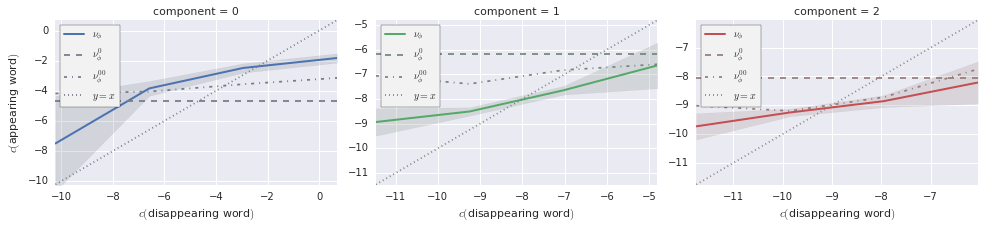

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1459 (cluster-unique) substitutions, but the PCA is in fact computed on 598 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.